### About this notebook
This is Tabuluar Play Ground Series. In this notebook, the pipeline strategy will be used using OneHotEncoder and SimpleImputer techniques for handling categroical and columns with missing values (null values). The RandomForestClassifier will be used for the model. 

### Libraries to be used

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing
from sklearn import ensemble
from sklearn import metrics
from sklearn import model_selection
from sklearn import decomposition
from sklearn import preprocessing
import os


In [2]:
data = pd.read_csv('/kaggle/input/tabular-playground-series-aug-2022/train.csv')
test_data = pd.read_csv('/kaggle/input/tabular-playground-series-aug-2022/test.csv')
sample_submission = pd.read_csv('/kaggle/input/tabular-playground-series-aug-2022/sample_submission.csv')

In [3]:
print('data set shape: ', data.shape)
data.head()

data set shape:  (26570, 26)


,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,A,80.10,material_7,material_8,9,5,7,8,4,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,1,A,84.89,material_7,material_8,9,5,14,3,3,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,2,A,82.43,material_7,material_8,9,5,12,1,5,...,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,3,A,101.07,material_7,material_8,9,5,13,2,6,...,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,4,A,188.06,material_7,material_8,9,5,9,2,8,...,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0


<AxesSubplot:>

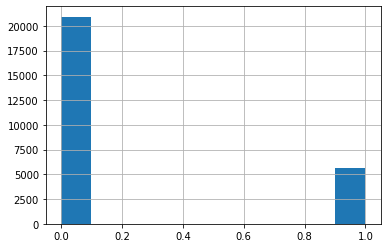

In [4]:
data.failure.hist()

The above histogram shows that the it is a classification problem

In [5]:
print("Null values in dataset: ", data.isnull().sum().sum())
print("Null values in test dataset: ", test_data.isnull().sum().sum())

Null values in dataset:  20273
Null values in test dataset:  15709


The null values exist in both the dataset and the test dataset

Now we will seperate the target ('failure') in y and remaining dataset in X

In [6]:
y = data.failure
X = data.drop(['failure','id'], axis =1 )
del data
X.head()

,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,A,80.10,material_7,material_8,9,5,7,8,4,18.040,...,20.155,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100
1,A,84.89,material_7,material_8,9,5,14,3,3,18.213,...,17.889,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057
2,A,82.43,material_7,material_8,9,5,12,1,5,18.057,...,18.288,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376
3,A,101.07,material_7,material_8,9,5,13,2,6,17.295,...,19.060,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282
4,A,188.06,material_7,material_8,9,5,9,2,8,19.346,...,18.093,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885


In [7]:
test_data = test_data.drop(['id'], axis =1 )
test_data.head()

,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,F,119.57,material_5,material_6,6,4,6,9,6,19.305,...,18.654,10.802,15.909,18.070,13.772,13.659,16.825,13.742,17.710,634.612
1,F,113.51,material_5,material_6,6,4,11,8,0,17.883,...,19.368,12.032,13.998,NaN,12.473,17.468,16.708,14.776,14.102,537.037
2,F,112.16,material_5,material_6,6,4,8,12,4,18.475,...,17.774,11.743,17.046,18.086,10.907,13.363,15.737,17.065,16.021,658.995
3,F,112.72,material_5,material_6,6,4,8,11,10,16.518,...,18.948,11.790,18.165,16.163,10.933,15.501,15.667,12.620,16.111,594.301
4,F,208.00,material_5,material_6,6,4,14,16,8,17.808,...,19.141,12.370,14.578,17.849,11.941,16.070,16.183,13.324,17.150,801.044


In [8]:
# Divide data into training and validation subsets
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

Recognizing the categorical columns and numerical columns

In [9]:
categorical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]
numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

print('categorical columns :', categorical_cols)
print('numerical columns :', numerical_cols)

categorical columns : ['product_code', 'attribute_0', 'attribute_1']
numerical columns : ['loading', 'attribute_2', 'attribute_3', 'measurement_0', 'measurement_1', 'measurement_2', 'measurement_3', 'measurement_4', 'measurement_5', 'measurement_6', 'measurement_7', 'measurement_8', 'measurement_9', 'measurement_10', 'measurement_11', 'measurement_12', 'measurement_13', 'measurement_14', 'measurement_15', 'measurement_16', 'measurement_17']


In [10]:
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = test_data[my_cols].copy()

In [11]:
print('X_train shape: ', X_train.shape)
X_train.head()

X_train shape:  (21256, 24)


,product_code,attribute_0,attribute_1,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
19456,D,material_7,material_5,126.25,6,6,9,15,6,17.905,...,19.309,13.169,15.618,19.998,9.799,14.097,17.106,15.941,15.215,801.669
17985,D,material_7,material_5,109.07,6,6,8,9,6,17.196,...,17.987,NaN,18.032,20.019,9.666,16.398,15.609,15.625,16.148,321.386
16936,D,material_7,material_5,149.87,6,6,13,7,10,16.758,...,18.604,10.946,16.912,18.001,10.679,14.246,16.733,15.783,16.344,NaN
6616,B,material_5,material_5,102.74,8,8,2,7,8,15.647,...,18.368,10.403,16.799,NaN,10.436,17.396,17.912,NaN,14.290,588.786
6925,B,material_5,material_5,162.03,8,8,7,12,14,16.399,...,19.939,9.799,13.720,20.386,12.075,12.223,NaN,15.674,13.649,506.357


In [12]:
print('X_test shape: ', X_test.shape)
X_test.head()

X_test shape:  (20775, 24)


,product_code,attribute_0,attribute_1,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,F,material_5,material_6,119.57,6,4,6,9,6,19.305,...,18.654,10.802,15.909,18.070,13.772,13.659,16.825,13.742,17.710,634.612
1,F,material_5,material_6,113.51,6,4,11,8,0,17.883,...,19.368,12.032,13.998,NaN,12.473,17.468,16.708,14.776,14.102,537.037
2,F,material_5,material_6,112.16,6,4,8,12,4,18.475,...,17.774,11.743,17.046,18.086,10.907,13.363,15.737,17.065,16.021,658.995
3,F,material_5,material_6,112.72,6,4,8,11,10,16.518,...,18.948,11.790,18.165,16.163,10.933,15.501,15.667,12.620,16.111,594.301
4,F,material_5,material_6,208.00,6,4,14,16,8,17.808,...,19.141,12.370,14.578,17.849,11.941,16.070,16.183,13.324,17.150,801.044


### Defining the preprocessing steps
imputes missing values in numerical data, and imputes missing values and applies a one-hot encoding to categorical data.


In [13]:
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [14]:
model = RandomForestClassifier(n_estimators=100, criterion = 'gini', max_depth= 10)

In [15]:
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])
# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
#preds = my_pipeline.predict(X_valid)
preds = my_pipeline.predict_proba(X_valid)[:,1]
accuracy = metrics.roc_auc_score(y_valid, preds)
print('Accuracy: ', accuracy)
y_preds = my_pipeline.predict_proba(X_test)[:,1]

Accuracy:  0.5756782948040542


In [16]:
sample_submission['failure'] = y_preds
sample_submission.to_csv('submission.csv',index = False)